# Feature Selection: A linear regression approach to find the impact of

the features of e-commerce sales data

Rafiq Islam  
2022-08-30

## Load the data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mywebstyle import plot_style
plot_style('#f4f4f4')
salesdata = pd.read_csv('Ecommerce Customers')
salesdata.head()

## EDA

### Descriptive Statistics

In [2]:
salesdata.describe()

In [3]:
salesdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB

### Visualization

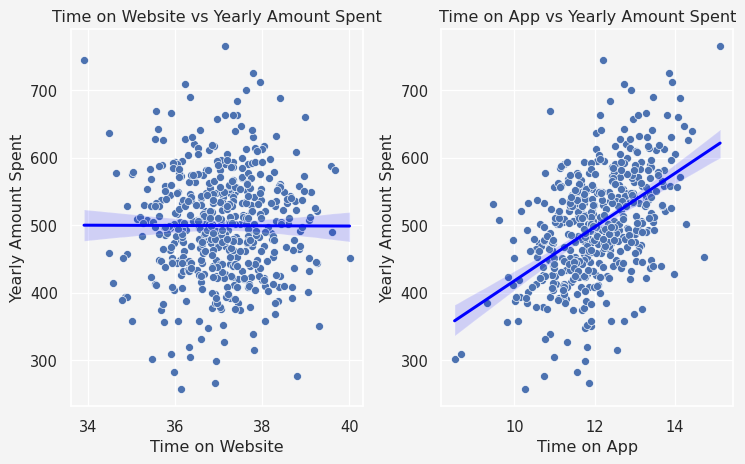

In [4]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(7.9, 5))

# Scatter plot with regression line for 'Time on Website' vs 'Yearly Amount Spent'
sns.scatterplot(
    x='Time on Website', y='Yearly Amount Spent', 
    data=salesdata, ax=ax1
    )
sns.regplot(
    x='Time on Website', y='Yearly Amount Spent', 
    data=salesdata, ax=ax1, scatter=False, color='blue'
    )
ax1.set_title('Time on Website vs Yearly Amount Spent')

# Scatter plot with regression line for 'Time on App' vs 'Yearly Amount Spent'
sns.scatterplot(
    x='Time on App', y='Yearly Amount Spent', 
    data=salesdata, ax=ax2
    )
sns.regplot(
    x='Time on App', y='Yearly Amount Spent',
    data=salesdata, ax=ax2, scatter=False, color='blue'
    )
ax2.set_title('Time on App vs Yearly Amount Spent')

plt.tight_layout()
plt.show()

So, from this plot, we see that `Time on Website` has no significant
trend or pattern on `Yearly Amount Spent` variable. However,
`Time on App` seems to have a linear relationship on
`Yearly Amount Spent`.

Next, we see the relationship between `Avg. Session Length` vs
`Yearly Amount Spent`, and `Length of Membership` vs
`Yearly Amount Spent`.

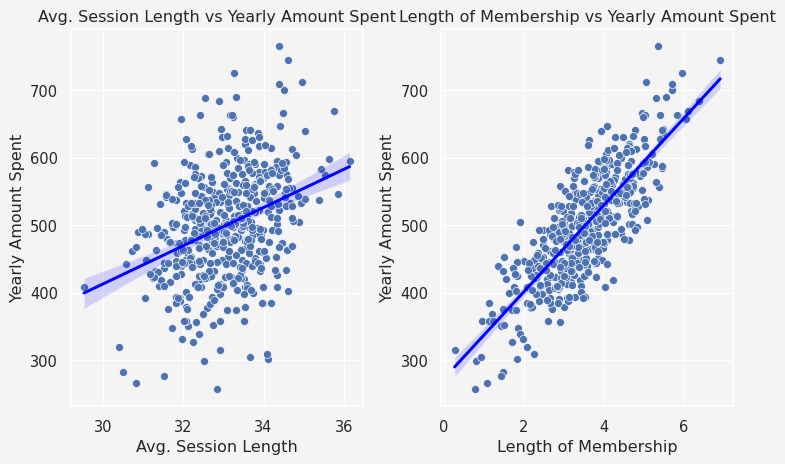

In [5]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(7.9, 5))

# Scatter plot with regression line for 'Time on Website' vs 'Yearly Amount Spent'
sns.scatterplot(
    x='Avg. Session Length', y='Yearly Amount Spent', 
    data=salesdata, ax=ax1
    )
sns.regplot(
    x='Avg. Session Length', y='Yearly Amount Spent', 
    data=salesdata, ax=ax1, scatter=False, color='blue'
    )
ax1.set_title('Avg. Session Length vs Yearly Amount Spent')

# Scatter plot with regression line for 'Time on App' vs 'Yearly Amount Spent'
sns.scatterplot(
    x='Length of Membership', y='Yearly Amount Spent', 
    data=salesdata, ax=ax2
    )
sns.regplot(
    x='Length of Membership', y='Yearly Amount Spent', 
    data=salesdata, ax=ax2, scatter=False, color='blue'
    )
ax2.set_title('Length of Membership vs Yearly Amount Spent')

plt.tight_layout()
plt.show()

Both of these features have impact on the dependent variable. However,
`Length of Membership` seems to have the most significant impact on
`Yearly Amount Spent`.

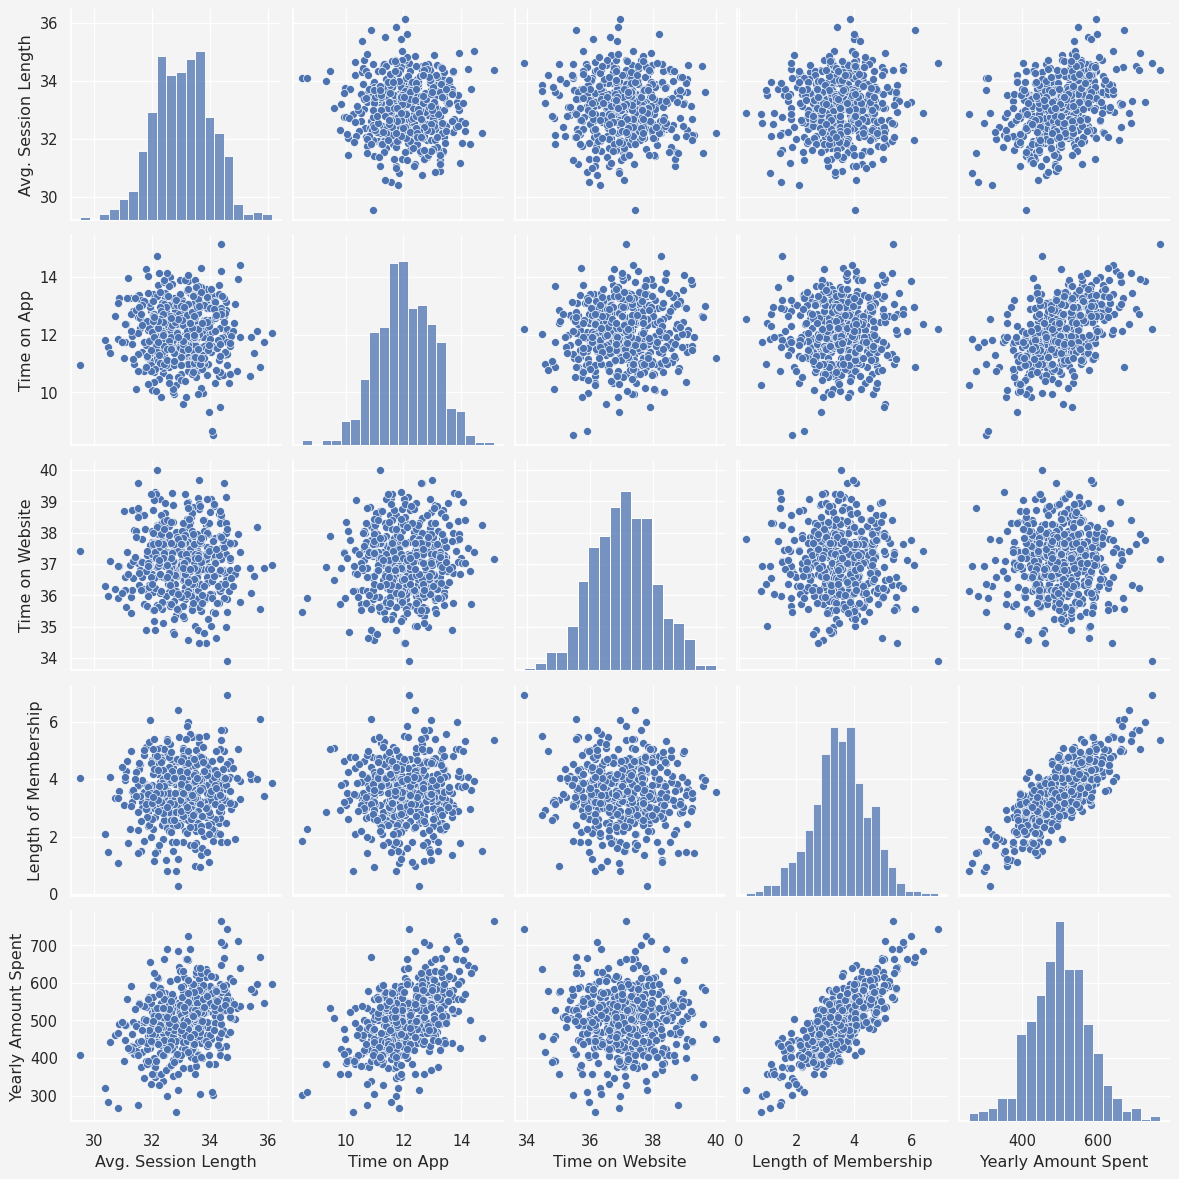

In [6]:
sns.pairplot(salesdata)

## Modeling

### Training

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = salesdata[
    ['Avg. Session Length', 'Time on App',
    'Time on Website', 'Length of Membership']
    ]
y = salesdata['Yearly Amount Spent']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.30, random_state=123
)

linreg = LinearRegression()
linreg.fit(X_train, y_train)
print('Coefficients: \n', linreg.coef_)

Coefficients: 
 [25.36266491 38.82367921  0.80356799 61.54905291]

### Testing

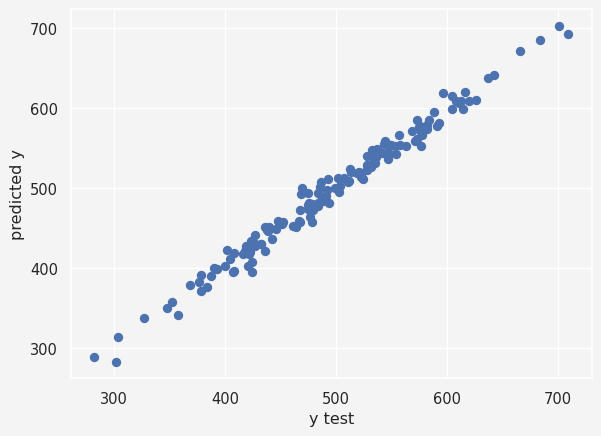

In [8]:
pred = linreg.predict(X_test)
plt.scatter(y_test, pred)
plt.xlabel('y test')
plt.ylabel('predicted y')
plt.show()

### Model Evaluation

In [9]:
from sklearn import metrics

print('MAE', metrics.mean_absolute_error(y_test, pred))
print('MSE', metrics.mean_squared_error(y_test, pred))
print('RMSE', metrics.root_mean_squared_error(y_test, pred))
print('R-squared:', metrics.r2_score(y_test, pred))

MAE 7.9880791942451
MSE 102.72313941866005
RMSE 10.135242444986703
R-squared: 0.9845789607829495

### Residual Analysis

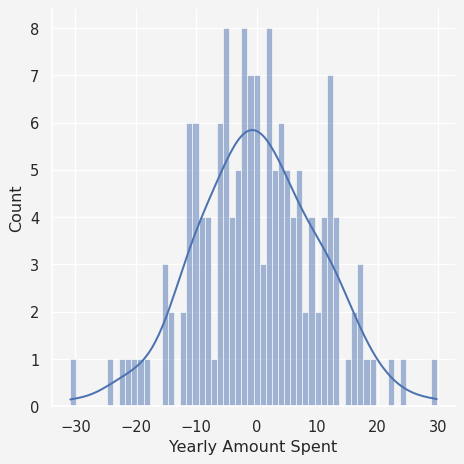

In [10]:
sns.displot(y_test-pred, bins= 60, kde=True)

## Conclusion

In [11]:
coeff = pd.DataFrame({
    'Feature': ['Intercept'] + list(X.columns), 
    'Coefficient': [linreg.intercept_] + list(linreg.coef_) 
})

coeff